<a href="https://colab.research.google.com/github/PMartey/Kaggle-Project/blob/main/Home_Credit_ML01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Home Credit - Credit Risk Model Stability
*Create a model measured against feature stability over time*  
Overview:    
The goal of this competition is to predict which clients are more likely to default on their loans. The evaluation will favor solutions that are stable over time.  

Your participation may offer consumer finance providers a more reliable and longer-lasting way to assess a potential client’s default risk.

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data1 = pd.read_csv('/content/drive/MyDrive/Kaggle Project 1/csv_files/train/train_base.csv')

In [ ]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   case_id        1526659 non-null  int64 
 1   date_decision  1526659 non-null  object
 2   MONTH          1526659 non-null  int64 
 3   WEEK_NUM       1526659 non-null  int64 
 4   target         1526659 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 58.2+ MB


In [ ]:
Data1.shape

(1526659, 5)

In [ ]:
print(len(Data1['case_id'].unique()))
Data1.head()


1526659


,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1


In [ ]:
Data2 = pd.read_csv('/content/drive/MyDrive/Kaggle Project 1/csv_files/train/train_applprev_1_0.csv')

<ipython-input-6-600bc5fbafdb>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  Data2 = pd.read_csv('/content/drive/MyDrive/Kaggle Project 1/csv_files/train/train_applprev_1_0.csv')


In [ ]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887684 entries, 0 to 3887683
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   case_id                      int64  
 1   actualdpd_943P               float64
 2   annuity_853A                 float64
 3   approvaldate_319D            object 
 4   byoccupationinc_3656910L     float64
 5   cancelreason_3545846M        object 
 6   childnum_21L                 float64
 7   creationdate_885D            object 
 8   credacc_actualbalance_314A   float64
 9   credacc_credlmt_575A         float64
 10  credacc_maxhisbal_375A       float64
 11  credacc_minhisbal_90A        float64
 12  credacc_status_367L          object 
 13  credacc_transactions_402L    float64
 14  credamount_590A              float64
 15  credtype_587L                object 
 16  currdebt_94A                 float64
 17  dateactivated_425D           object 
 18  district_544M                object 
 19  

In [ ]:
#looking at the number of unique case ids
len(Data2['case_id'].unique())

782997

In [ ]:
Data2.head()

,case_id,actualdpd_943P,annuity_853A,approvaldate_319D,byoccupationinc_3656910L,cancelreason_3545846M,childnum_21L,creationdate_885D,credacc_actualbalance_314A,credacc_credlmt_575A,...,num_group1,outstandingdebt_522A,pmtnum_8L,postype_4733339M,profession_152M,rejectreason_755M,rejectreasonclient_4145042M,revolvingaccount_394A,status_219L,tenor_203L
0,2,0.0,640.2,NaN,NaN,a55475b1,0.0,2013-04-03,NaN,0.0,...,0,NaN,24.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,D,24.0
1,2,0.0,1682.4,NaN,NaN,a55475b1,0.0,2013-04-03,NaN,0.0,...,1,NaN,12.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,D,12.0
2,3,0.0,6140.0,NaN,NaN,P94_109_143,NaN,2019-01-07,NaN,0.0,...,0,NaN,12.0,a55475b1,a55475b1,P94_109_143,a55475b1,NaN,D,12.0
3,4,0.0,2556.6,NaN,NaN,P24_27_36,NaN,2019-01-08,NaN,0.0,...,0,NaN,24.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,T,24.0
4,5,0.0,NaN,NaN,NaN,P85_114_140,NaN,2019-01-16,NaN,NaN,...,0,NaN,NaN,a55475b1,a55475b1,a55475b1,a55475b1,NaN,T,NaN


In [ ]:
# Joining the two data frames together
df0 = pd.merge(Data1, Data2, on = 'case_id', how = 'inner')

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887684 entries, 0 to 3887683
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   case_id                      int64  
 1   date_decision                object 
 2   MONTH                        int64  
 3   WEEK_NUM                     int64  
 4   target                       int64  
 5   actualdpd_943P               float64
 6   annuity_853A                 float64
 7   approvaldate_319D            object 
 8   byoccupationinc_3656910L     float64
 9   cancelreason_3545846M        object 
 10  childnum_21L                 float64
 11  creationdate_885D            object 
 12  credacc_actualbalance_314A   float64
 13  credacc_credlmt_575A         float64
 14  credacc_maxhisbal_375A       float64
 15  credacc_minhisbal_90A        float64
 16  credacc_status_367L          object 
 17  credacc_transactions_402L    float64
 18  credamount_590A              float64
 19  

In [ ]:
import datetime as dt

In [ ]:

# Change date and month col to date and time

df0['date_decision'] = pd.to_datetime(df0['date_decision'], format = '%Y-%m-%d')
df0['MONTH'] =  pd.to_datetime(df0['MONTH'], format = '%Y%m')
df0['approvaldate_319D'] = pd.to_datetime(df0['approvaldate_319D'], format = '%Y-%m-%d')
df0.head(10)


,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpd_943P,annuity_853A,approvaldate_319D,byoccupationinc_3656910L,cancelreason_3545846M,...,num_group1,outstandingdebt_522A,pmtnum_8L,postype_4733339M,profession_152M,rejectreason_755M,rejectreasonclient_4145042M,revolvingaccount_394A,status_219L,tenor_203L
0,2,2019-01-04,2019-01-01,0,0,0.0,640.200,NaT,NaN,a55475b1,...,0,NaN,24.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,D,24.0
1,2,2019-01-04,2019-01-01,0,0,0.0,1682.400,NaT,NaN,a55475b1,...,1,NaN,12.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,D,12.0
2,3,2019-01-03,2019-01-01,0,0,0.0,6140.000,NaT,NaN,P94_109_143,...,0,NaN,12.0,a55475b1,a55475b1,P94_109_143,a55475b1,NaN,D,12.0
3,4,2019-01-04,2019-01-01,0,1,0.0,2556.600,NaT,NaN,P24_27_36,...,0,NaN,24.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,T,24.0
4,5,2019-01-02,2019-01-01,0,0,0.0,NaN,NaT,NaN,P85_114_140,...,0,NaN,NaN,a55475b1,a55475b1,a55475b1,a55475b1,NaN,T,NaN
5,6,2019-01-03,2019-01-01,0,0,0.0,1773.800,NaT,NaN,P94_109_143,...,0,NaN,11.0,a55475b1,a55475b1,P94_109_143,a55475b1,NaN,D,11.0
6,6,2019-01-03,2019-01-01,0,0,0.0,4189.600,NaT,NaN,P94_109_143,...,1,NaN,11.0,a55475b1,a55475b1,P94_109_143,a55475b1,NaN,D,11.0
7,6,2019-01-03,2019-01-01,0,0,0.0,1110.400,NaT,1.0,a55475b1,...,2,0.0,24.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,D,24.0
8,10,2019-01-03,2019-01-01,0,0,0.0,10916.601,2019-01-11,NaN,P73_130_169,...,0,NaN,12.0,a55475b1,a55475b1,a55475b1,a55475b1,NaN,T,12.0
9,13,2019-01-03,2019-01-01,0,0,0.0,5069.600,NaT,NaN,P94_109_143,...,0,NaN,12.0,a55475b1,a55475b1,P94_109_143,a55475b1,NaN,D,12.0


In [ ]:
# looking at the length of my merged data set
len(df0['case_id'].unique())
df0['approvaldate_319D']

0                NaT
1                NaT
2                NaT
3                NaT
4                NaT
             ...    
3887679          NaT
3887680   2017-11-09
3887681   2015-12-11
3887682   2014-02-15
3887683   2012-12-12
Name: approvaldate_319D, Length: 3887684, dtype: datetime64[ns]

In [ ]:
print('Date for final decision: \n',df0['date_decision'].dt.year.value_counts())

print("Date for approving the loan: \n", df0['approvaldate_319D'].dt.year.value_counts())


Date for final decision: 
 2019    3887684
Name: date_decision, dtype: int64
Date for approving the loan: 
 2018.0    524589
2017.0    345055
2019.0    278838
2016.0    199019
2015.0    158917
2014.0    141494
2013.0    133229
2012.0     99855
2011.0     65783
2008.0     42076
2006.0     39690
2007.0     37689
2010.0     35765
2009.0     19662
2005.0         2
Name: approvaldate_319D, dtype: int64


### Data Cleaning
Need to remove duplicates  
Take care of date and time   
Deal with null values and select some features for my decision tree, and random
forest    
Select random rows after selecting feeatures and then use group by

In [ ]:
#df2.duplicated().value_counts()

In [ ]:
# Use the duplicated() method to find duplicates
df0.duplicated().value_counts()

# so there are no duplicate rows

False    3887684
dtype: int64

I need to select my features before any thing else


In [ ]:
#Selecting  10 features to look at: Case id, target, decision date, occupation, week num, education, credit limit, outstanding debt, and main occupation income
df1 = df0.iloc[:,[0,1,3,4,8,13,26,33,36]]
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887684 entries, 0 to 3887683
Data columns (total 9 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   case_id                   int64         
 1   date_decision             datetime64[ns]
 2   WEEK_NUM                  int64         
 3   target                    int64         
 4   byoccupationinc_3656910L  float64       
 5   credacc_credlmt_575A      float64       
 6   education_1138M           object        
 7   mainoccupationinc_437A    float64       
 8   outstandingdebt_522A      float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 296.6+ MB


In [ ]:
# Groupby caseid, date of decision, and education sum numeric values
df2 = df1.groupby(['case_id','date_decision','education_1138M','target']).sum()

# Reset the index to bring 'Category' and 'NonNumericColumn' back as regular columns
df2 = df2.reset_index()

df2.head()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401024 entries, 0 to 1401023
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   case_id                   1401024 non-null  int64         
 1   date_decision             1401024 non-null  datetime64[ns]
 2   education_1138M           1401024 non-null  object        
 3   target                    1401024 non-null  int64         
 4   WEEK_NUM                  1401024 non-null  int64         
 5   byoccupationinc_3656910L  1401024 non-null  float64       
 6   credacc_credlmt_575A      1401024 non-null  float64       
 7   mainoccupationinc_437A    1401024 non-null  float64       
 8   outstandingdebt_522A      1401024 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 96.2+ MB


In [ ]:
# refer to this later

# Joining df and df1 to merge columns using inner join
#df2 = pd.merge(df1, df, on = 'case_id', how = 'right')
#df2.head()
#df2.info()

## EDA

In [ ]:
# remove extra whitespace in cols
df2.columns = df2.columns.str.strip()

# Basic descriptive statistics on numeric variables
df2.describe()

,case_id,target,WEEK_NUM,byoccupationinc_3656910L,credacc_credlmt_575A,mainoccupationinc_437A,outstandingdebt_522A
count,1.401024e+06,1.401024e+06,1.401024e+06,1.401024e+06,1.401024e+06,1.401024e+06,1.401024e+06
mean,1.403329e+06,3.360185e-02,7.592550e+01,1.401217e+04,8.754754e+03,1.100318e+05,1.302919e+04
std,7.172218e+05,1.802021e-01,9.035535e+01,5.327877e+04,2.830687e+04,1.348789e+05,4.035041e+04
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.249985e+06,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,3.500000e+04,0.000000e+00
50%,1.442204e+06,0.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00,6.600000e+04,0.000000e+00
75%,1.630855e+06,0.000000e+00,9.300000e+01,1.000000e+00,0.000000e+00,1.340000e+05,0.000000e+00
max,2.651092e+06,1.000000e+00,9.800000e+02,2.550000e+06,1.320000e+06,3.420000e+06,1.210629e+06


In [ ]:
# select a random sample for df2 for my EDA
df = df2.sample(250)

Plot every numeric variable in the data set against each other

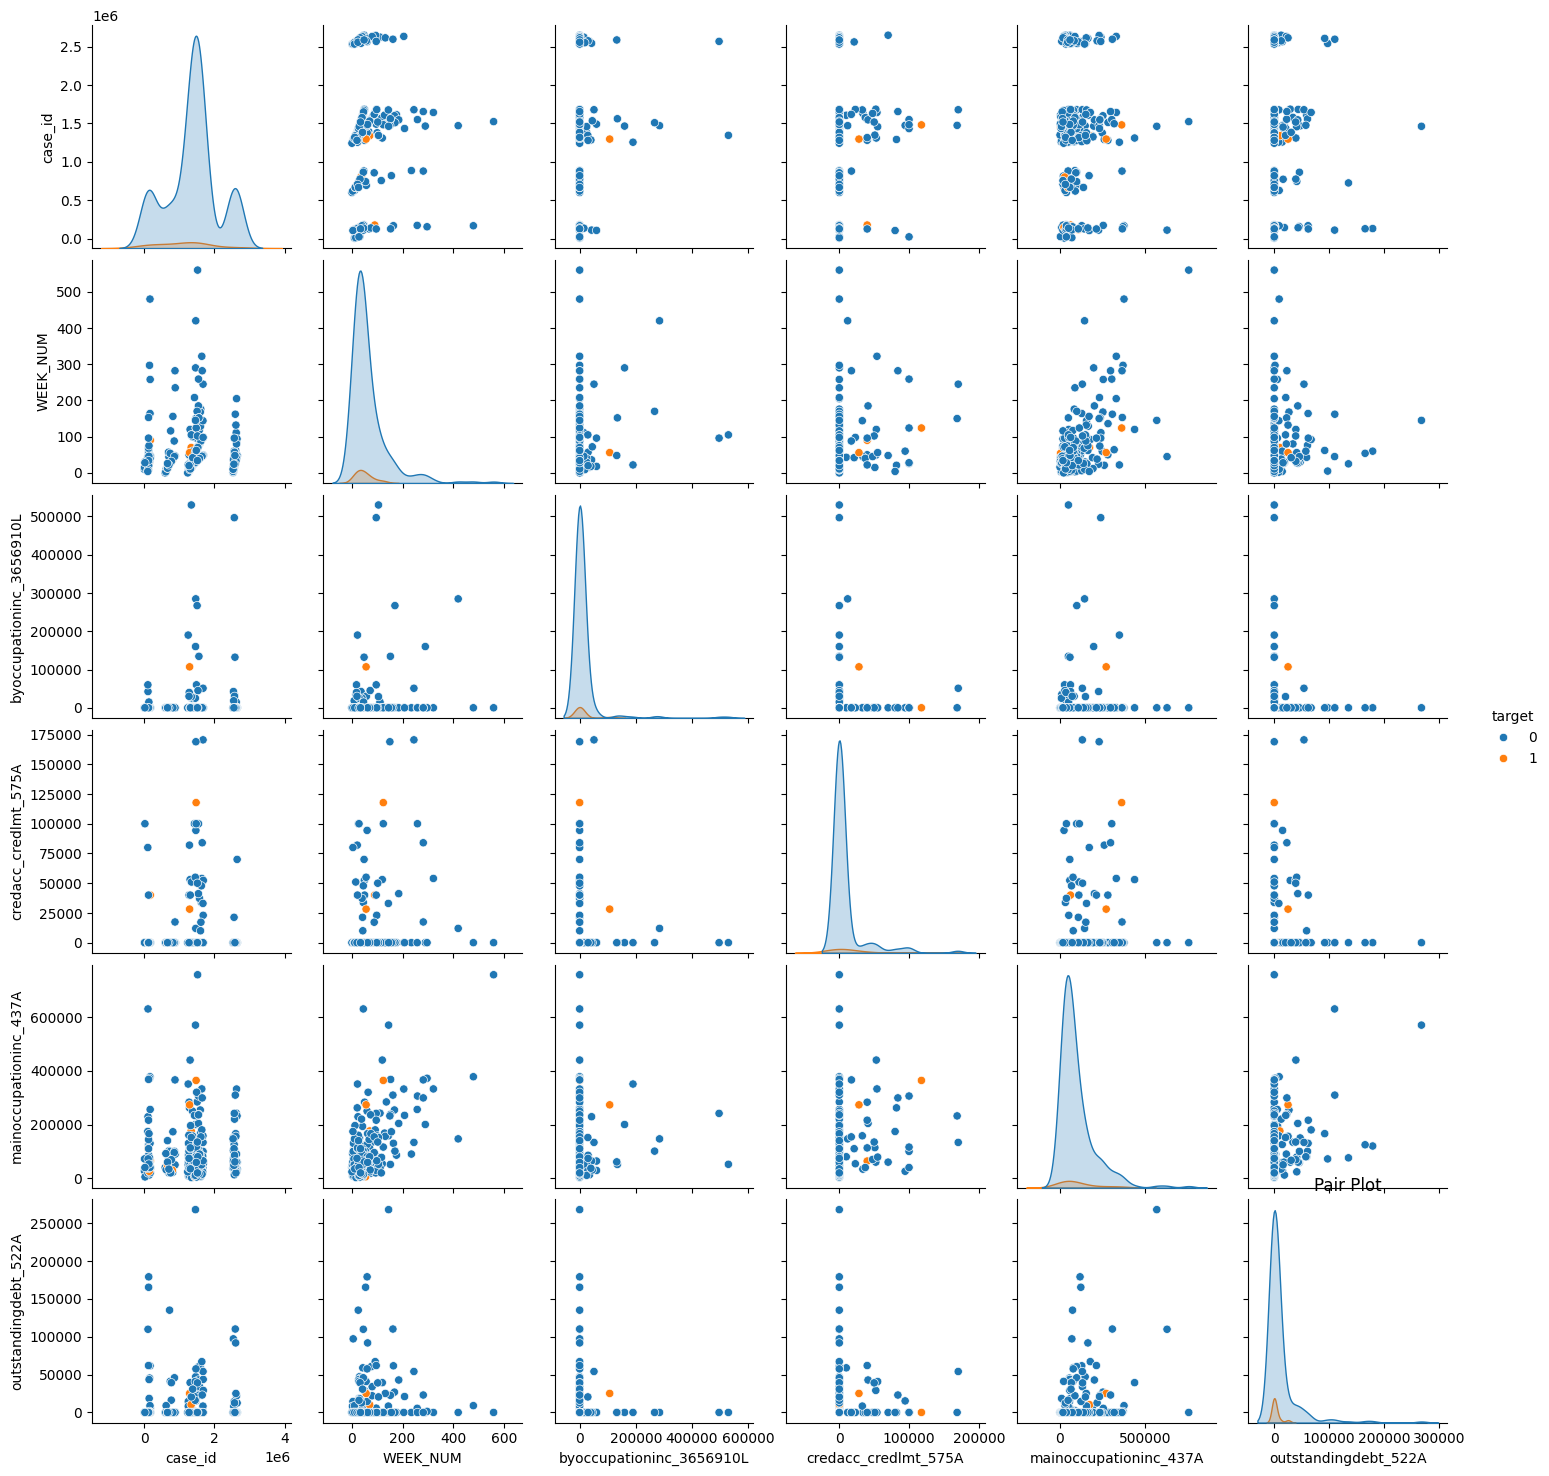

In [ ]:
# pairplot color by target ( default a loan 1 and 0 otherwise)
sns.pairplot(df, hue = 'target')
# give the plot a title
plt.title('Pair Plot')
plt.show()

<Axes: xlabel='credacc_credlmt_575A', ylabel='Count'>

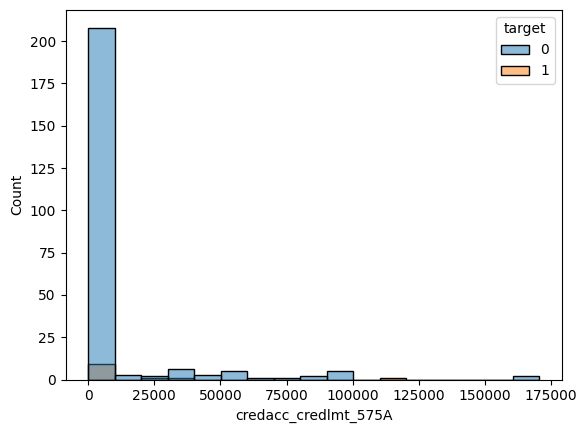

In [ ]:
# create a histogram of credit limit with target overlay
sns.histplot(x = 'credacc_credlmt_575A', hue = 'target', data = df, binwidth=10000)



<Axes: xlabel='credacc_credlmt_575A', ylabel='Density'>

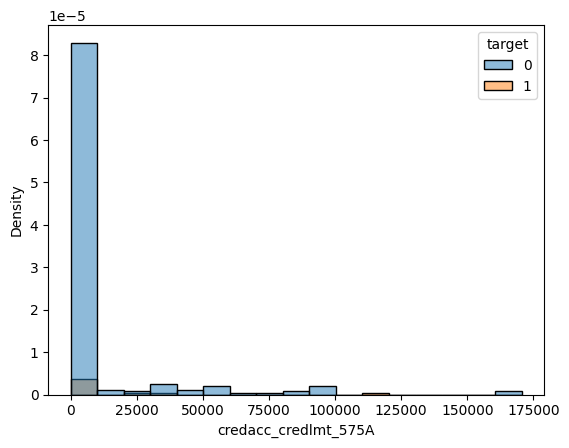

In [ ]:
# create a normalized histogram of credit limit with target overlay
sns.histplot(x = 'credacc_credlmt_575A', hue = 'target', data = df, binwidth=10000, stat = 'density')


<Axes: xlabel='outstandingdebt_522A', ylabel='Count'>

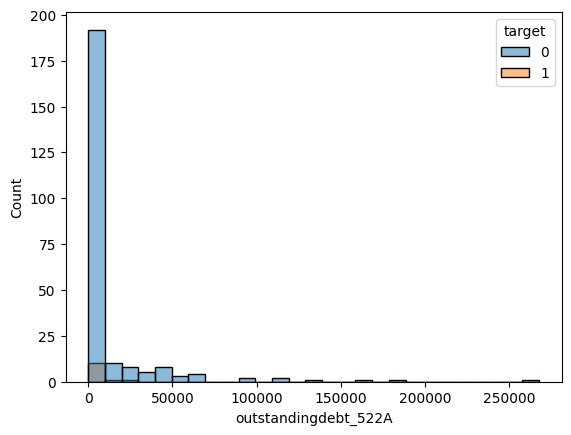

In [ ]:
## create a histogram of outstanding debt with target overlay
sns.histplot(x = 'outstandingdebt_522A', hue = 'target', data = df, binwidth= 10000)


In [ ]:
# create a correlation heat map to see which values are highly correlated
#the code in the block creates a correlation matrix of the numerical data
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-27-73029c2aa608>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,case_id,target,WEEK_NUM,byoccupationinc_3656910L,credacc_credlmt_575A,mainoccupationinc_437A,outstandingdebt_522A
case_id,1.000000,-0.085397,0.015678,0.089067,0.005442,-0.027765,-0.072348
target,-0.085397,1.000000,-0.047722,-0.010642,0.063898,0.014437,-0.054973
WEEK_NUM,0.015678,-0.047722,1.000000,0.193205,0.224547,0.618255,0.089967
byoccupationinc_3656910L,0.089067,-0.010642,0.193205,1.000000,-0.024654,0.072589,-0.056659
credacc_credlmt_575A,0.005442,0.063898,0.224547,-0.024654,1.000000,0.221496,0.026988
mainoccupationinc_437A,-0.027765,0.014437,0.618255,0.072589,0.221496,1.000000,0.322636
outstandingdebt_522A,-0.072348,-0.054973,0.089967,-0.056659,0.026988,0.322636,1.000000


In [ ]:
# create a time series analysis using decision date with target
df['date_decision'].dt.year.value_counts()
df['date_decision'].dt.month.value_counts()

7     29
8     27
11    26
9     26
2     22
10    20
4     20
5     18
12    17
1     16
6     16
3     13
Name: date_decision, dtype: int64

Since Outstanding debt and current debt have a correlation of 0.97737. I will use just one of these varaibles (current_debt) for the XGboost or random forest model.  
There is also a 100% correlation between tenor_203L and pmtnum_8L so I will use just one ( tenor_203L)

In [ ]:
#check for NaN values
df.isna().sum(axis = 0)

case_id                     0
date_decision               0
education_1138M             0
target                      0
WEEK_NUM                    0
byoccupationinc_3656910L    0
credacc_credlmt_575A        0
mainoccupationinc_437A      0
outstandingdebt_522A        0
dtype: int64

In [ ]:
#df1 = df.drop(columns = ['outstandingdebt_522A', 'tenor_203L'], axis = 1)

## Prepare data for modeling
we will be using two learning models
XGBoost : One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.  
link:https://www.geeksforgeeks.org/xgboost/  

Random forest:

In [ ]:
# need to change these classifications to nummeric variables
#df1['education_1138M'].unique()

In [ ]:
#df1['credtype_587L'].unique()

We will use only the available numeric columns for now

In [ ]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
# define training and test variables for df1 data frame
#df_train , df_test = train_test_split(df2, test_size= 0.25)

In [ ]:
df2.columns
df2['education_1138M'].unique()

array(['P97_36_170', 'a55475b1', 'P17_36_170', 'P33_146_175',
       'P106_81_188', 'P157_18_172'], dtype=object)

In [ ]:
#df_train['education_1138M'].unique()

In [ ]:
# Impute missing values
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#pipeline = Pipeline([
 #   ('imputer', imputer),
  #  ('scaler', StandardScaler()),
   # ('model', RandomForestClassifier(criterion= 'gini', max_depth= 8, min_samples_split= 10, random_state=10, n_estimators=100))
#])
#pipeline.fit(x_train, y_train)

In [ ]:
# set eduction col as a numpy array
edu_arr = np.array(df2['education_1138M'])

#create a data frame using the edu_arr array
edu_pd = pd.DataFrame(edu_arr)

# create dummy for my class education
edu_dummy = pd.get_dummies(edu_pd)
edu_dummy.head()



,0_P106_81_188,0_P157_18_172,0_P17_36_170,0_P33_146_175,0_P97_36_170,0_a55475b1
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [ ]:
#df_train= pd.DataFrame(df_train)
#df_train.isna().sum(axis = 0)

In [ ]:
# Concatenate the dummy variables with the original features
# and save the result as X
x = pd.concat((df2[['WEEK_NUM','byoccupationinc_3656910L',
                                     'credacc_credlmt_575A', 'mainoccupationinc_437A',
                                     'outstandingdebt_522A']], edu_dummy), axis = 1)

In [ ]:
y= df2['target'].astype('string')

#y= pd.DataFrame(df_train['target']).astype('object')
#x['date_decision'] = x['date_decision'].astype('object')
#date of decision giving me problems just going to remove it

In [ ]:
x.dtypes
y.dtypes

string[python]

In [ ]:
x.head(10)

,WEEK_NUM,byoccupationinc_3656910L,credacc_credlmt_575A,mainoccupationinc_437A,outstandingdebt_522A,0_P106_81_188,0_P157_18_172,0_P17_36_170,0_P33_146_175,0_P97_36_170,0_a55475b1
0,0,0.0,0.0,16400.0,0.0,0,0,0,0,1,0
1,0,0.0,0.0,11000.0,0.0,0,0,0,0,1,0
2,0,0.0,0.0,16000.0,0.0,0,0,0,0,0,1
3,0,0.0,0.0,62000.0,0.0,0,0,0,0,0,1
4,0,1.0,0.0,49000.0,0.0,0,0,0,0,1,0
5,0,0.0,0.0,37000.0,0.0,0,0,0,0,0,1
6,0,0.0,0.0,57000.0,0.0,0,0,1,0,0,0
7,0,0.0,0.0,5000.0,0.0,0,0,0,0,1,0
8,0,0.0,0.0,128000.0,0.0,0,0,0,0,0,1
9,0,0.0,0.0,50000.0,0.0,0,0,0,0,1,0


In [ ]:
x.isna().sum(axis = 0)

WEEK_NUM                    0
byoccupationinc_3656910L    0
credacc_credlmt_575A        0
mainoccupationinc_437A      0
outstandingdebt_522A        0
0_P106_81_188               0
0_P157_18_172               0
0_P17_36_170                0
0_P33_146_175               0
0_P97_36_170                0
0_a55475b1                  0
dtype: int64

### Random Forest

In [ ]:
#import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In Python, the random forest command requires a response variable to be formatted as a one-dimensional array. To achieve this format, we utilize numpy's ravel() command.

In [ ]:
#use numpy’s ravel() command to format the response variable
#as a one-dimensional array
rfy = np.ravel(y)

In [ ]:
#run code for the RandomForestClassifier
rf01 = RandomForestClassifier(n_estimators = 100,
                              criterion="gini").fit(x,rfy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
#specify the names of each column of X
X_names = x.columns
y_names = list(set(y))
#y_names

# to help of visualize the CART alogrithm, it will help to know the
#levels of y, so we give y names
#y_names = ["<=50K", ">50K"]

#extract a single decision tree estimator from the random forest
estimator = rf01.estimators_[0]

#export the decision tree of the estimator to Graphviz format
rf01_data = export_graphviz(estimator, out_file = None,
                feature_names=X_names, class_names=y_names)

#create a graph from the Graphviz data
rf01_graph = graphviz.Source(rf01_data)
rf01_graph

rf01_graph.view()


Alternatively, you can use the export_text function instead of export_graphviz to export the decision tree of the random forest classifier to a text format.
#export the decision tree of the RandomForestClassifier to text format
rf01_data = export_text(rf01, out_file = None,
                feature_names=X_names, class_names=y_names)

#print the text representation of the decision tree
print(rf01_data)

In [ ]:
#To view the classifications made on the training data set
#by the random forests algorithm, use the **predict()** command
rf_train=rf01.predict(x)

#create a data frame for rf_train. Use this for counts/percentages
rf_train_df=pd.DataFrame(rf_train)

In [ ]:
#use value counts to gather the number of classifications
#made by the random forests algorithm
rf_train_df.value_counts()

0    1373973
1      27051
dtype: int64

In [ ]:
#use value counts to gather the percentage of classifications
#made by the random forests algorithm
rf_train_df.value_counts()/len(rf_train)

0    0.980692
1    0.019308
dtype: float64

In [ ]:
# Make predictions on test data

#x_test = df1_test[['case_id','MONTH',	'WEEK_NUM',	'actualdpd_943P',	'annuity_853A'	,'byoccupationinc_3656910L',	'childnum_21L',	'credacc_actualbalance_314A',	'credacc_credlmt_575A', 'credamount_590A',	'currdebt_94A',	'downpmt_134A',	'mainoccupationinc_437A',	'maxdpdtolerance_577P',	'num_group1',	'pmtnum_8L',	'revolvingaccount_394A']].values
#y_test = df1_test['target'].values
#y_pred = pipeline.predict(x_test)

# Print the predictions
#print(y_pred)

In [ ]:
# evaluate the model
#np.mean(y_pred == y_test)

In [ ]:
# Know the importance of all the features (independent variables)
#pipeline.feature_importances_

The random forest has an accuracy of 96.4%

# XGBoost model

In [ ]:
# Import necessary modules
import xgboost as xgb

# Define the model
model = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees in the model
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate for the boosting algorithm
    objective='binary:logistic',  # Objective function for binary classification
    seed=42,   # Random seed for reproducibility
    eta = 0.01,
    gamma = 100
)

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred01 = model.predict(x_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred01)
print(f"Accuracy: {accuracy:.3f}")

The XGBoost model has the same accuracy

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import scipy.signal

# Compute ROC curve and ROC area for each class
y_prob = model.predict_proba(x_test)[:, 1]
roc_auc_train = roc_auc_score(y_train, model.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print("AUC: %.3f" % roc_auc_train)

# Ensure that y_prob and y_test are sorted by y_prob
sorted_indices = np.argsort(y_prob)
y_prob_sorted = y_prob[sorted_indices]
y_test_sorted = y_test[sorted_indices]
roc_auc = roc_curve(y_test_sorted.ravel(), y_prob_sorted)
roc_auc = roc_auc_score(y_test_sorted, y_prob_sorted)
#print("AUC: %.3f" % roc_auc[0])


# Smoothen the ROC curve data.
smoothed_fpr = scipy.signal.savgol_filter(fpr, window_length=5, polyorder=3, axis=0)
smoothed_tpr = scipy.signal.savgol_filter(tpr, window_length=5, polyorder=3, axis=0)
# Plot the smoothed ROC curve.
#plt.plot(smoothed_fpr, smoothed_tpr)
#plt.show()
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(smoothed_fpr, smoothed_tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Baseline')
#plt.plot(fpr, tpr, color='green', lw=2,  label=f'AUC = {roc_auc : .2f}')
#plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('Y test') # the actual correct y varaibles i.e 0 or 1 , fpr
plt.ylabel('Y predicted') # the predicted correct y varaibles i.e 0 or 1 ,
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic (ROC) Curve')

#save as image
plt.savefig('roc_curve.png')
plt.show()

In [ ]:
#know the count of 0's and 1's the target variables
df1['target'].value_counts()


In [ ]:
df1_train['target'].value_counts()


In [ ]:
df1_test['target'].value_counts()

In [ ]:
# refer to Wiley page 74
# our 1 for the training data set is less than 4% of the data
# we want to create a random data to increase the 1   to 30%  ie( about 292990)
df1_train['target'].value_counts(normalize=True)


In [ ]:
#To begin resampling, we isolate the records which we want to resample.
to_resample = df1_train.loc[df1_train['target'] == 1]

In [ ]:
#Next, we need to sample from our records of interest
our_resample = to_resample.sample(n = 292990, replace = True)

In [ ]:
#Finally, we add the resampled records to our original training data set.
df1_train_rebal = pd.concat([df1_train, our_resample])
#The concat() command attaches two data sets by putting the rows on top of
#each other. The result is a single data set made up of the records in both bank_train
#and our_resample, which is saved as its own data set under the name
#bank_train_rebal

In [ ]:
# Lets see how this new data set behaves
x_train1 = df1_train_rebal[['case_id','MONTH',	'WEEK_NUM',	'actualdpd_943P',	'annuity_853A'	,'byoccupationinc_3656910L',	'childnum_21L',	'credacc_actualbalance_314A',	'credacc_credlmt_575A', 'credamount_590A',	'currdebt_94A',	'downpmt_134A',	'mainoccupationinc_437A',	'maxdpdtolerance_577P',	'num_group1',	'pmtnum_8L',	'revolvingaccount_394A']].values
y_train1 = df1_train_rebal['target'].values
df1_train_rebal['target'].value_counts(normalize=True)

In [ ]:
# trying them on 4 different models and see which one has a the best accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
# running various models
models = []
#models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', model))

# model is from an earlier code for calling the XGBoost model and setting hyperparameters

import time

In [ ]:
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 1
# Create a for loop
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   # cv_results = model_selection.cross_val_score(model, x_train1, y_train1, cv=kfold, scoring=scoring)
    #results.append(cv_results)
    #names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)
    start_time = time.time()
    model.fit(x_train1, y_train1)

    y_pred02 = model.predict(x_test)
    pred1 = [round(value) for value in y_pred02]
    print(accuracy_score(y_test, y_pred02))
    print(confusion_matrix(y_test, y_pred02))
    print(classification_report(y_test, y_pred02))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

In [ ]:
# Check for missing values in X_train1
missing_values = x_train1[np.isnan(x_train1)]

# Print the number of missing values
print(f"Number of missing values in X_train1: {missing_values.size}")

# Check for missing values in y_train1
missing_values = y_train1[np.isnan(y_train1)]

# Print the number of missing values
print(f"Number of missing values in y_train1: {missing_values.size}")

In [ ]:
# Impute missing values in X_train1 using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
x_train1 = imputer.fit_transform(x_train1)
x_test = imputer.transform(x_test)
# Impute missing values in y_train1 using the most frequent value
#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#y_train1 = imputer.fit_transform(y_train1)

In [ ]:
# Create a for loop
for name, model in models:
   # kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   ## cv_results = model_selection.cross_val_score(model, x_train1, y_train1, cv=kfold, scoring=scoring)
   # results.append(cv_results)
   # names.append(name)
  #  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)
    start_time = time.time()
    model.fit(x_train1, y_train1)
    y_pred02 = model.predict(x_test)
    pred1 = [round(value) for value in y_pred02]
    print(accuracy_score(y_test, y_pred02))
    print(confusion_matrix(y_test, y_pred02))
    print(classification_report(y_test, y_pred02))
